In [62]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
complete_data = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [63]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = complete_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)

# Preview DataFrame
mean_tumor_vol

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [64]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_vol = complete_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
se_tumor_vol = pd.DataFrame(se_tumor_vol)

# Preview DataFrame
se_tumor_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [65]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol = mean_tumor_vol.reset_index()
mean_tumor_pivot = mean_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

se_tumor_vol = se_tumor_vol.reset_index()
se_tumor_pivot = se_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
mean_tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


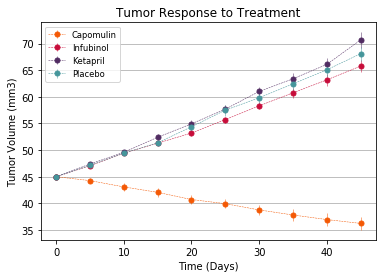

In [66]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Capomulin"], yerr=se_tumor_pivot["Capomulin"], color="#f45905", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Infubinol"], yerr=se_tumor_pivot["Infubinol"], color="#c70d3a", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Ketapril"], yerr=se_tumor_pivot["Ketapril"], color="#512c62", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_pivot.index, mean_tumor_pivot["Placebo"], yerr=se_tumor_pivot["Placebo"], color="#45969b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="upper left", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Figure_1.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [67]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = complete_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_met_site = pd.DataFrame(mean_met_site)

# Preview DataFrame
mean_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [68]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_met_site = complete_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
se_met_site = pd.DataFrame(se_met_site)

# Preview DataFrame
se_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [69]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site = mean_met_site.reset_index()
mean_met_pivot = mean_met_site.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

se_met_site = se_met_site.reset_index()
se_met_pivot = se_met_site.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
mean_met_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


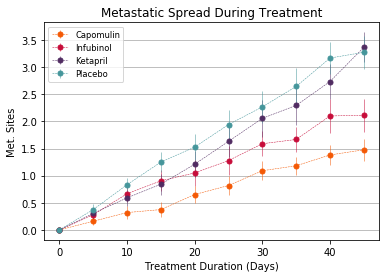

In [70]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_met_pivot.index, mean_met_pivot["Capomulin"], yerr=se_met_pivot["Capomulin"], color="#f45905", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_met_pivot.index, mean_met_pivot["Infubinol"], yerr=se_met_pivot["Infubinol"], color="#c70d3a", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_met_pivot.index, mean_met_pivot["Ketapril"], yerr=se_met_pivot["Ketapril"], color="#512c62", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_met_pivot.index, mean_met_pivot["Placebo"], yerr=se_met_pivot["Placebo"], color="#45969b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="upper left", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Figure_2.png")

# Show the Figure
plt.show()


## Survival Rates

In [71]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = complete_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [72]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


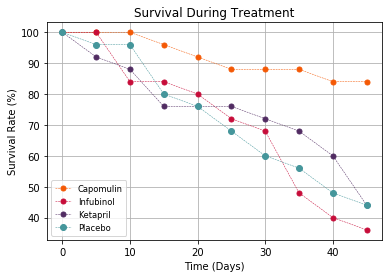

In [73]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, color="#f45905", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, color="#c70d3a", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, color="#512c62", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Placebo"] / 25 , color="#45969b", marker="o", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Figure_3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [74]:
# Calculate the percent changes for each drug
tumor_mean_change =  100 * (mean_tumor_pivot.iloc[-1] - mean_tumor_pivot.iloc[0]) / mean_tumor_pivot.iloc[0]
tumor_se_change =  100 * (se_tumor_pivot.iloc[-1] - se_tumor_pivot.iloc[0]) / se_tumor_pivot.iloc[0]

# Display the data to confirm
tumor_mean_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

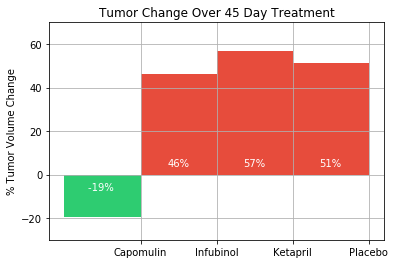

In [75]:
# Store all Relevant Percent Changes into a Tuple
relevant_changes = (tumor_mean_change["Capomulin"], 
                    tumor_mean_change["Infubinol"], 
                    tumor_mean_change["Ketapril"], 
                    tumor_mean_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(relevant_changes))  
width = 1
rectsPass = ax.bar(ind[0], relevant_changes[0], width, color='#2ECC71')
rectsFail = ax.bar(ind[1:], relevant_changes[1:], width, color='#E74C3C')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="#ffffff")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '%d%% ' % int(height),
                ha='center', va='bottom', color="#ffffff")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("analysis/Figure_4.png")

# Show the Figure
fig.show()

In [76]:
#Analysis

#1. Capomulin had the highest survival rate.
#2. Capomulin was also the only drug to show reduction in tumors over time.
#3. The placebo out performed infubinol in survival rate and ketapril in overall change.
